# Earth Mover's distances for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE


In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevtev_TeVspectrum_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,0.055155,0.201477,0.000004,0.235066,0.028249,0.0,0.391619,0.072840,0.013193,0.002028,0.000367,b' ',b'bll ',b'',b'hbl',0
1,0.069119,0.073172,0.003407,0.038325,0.145615,0.0,0.134071,0.020429,0.006452,0.059379,0.450031,b' ',b'snr ',b'',b'snr',0
2,0.358190,0.178179,0.096737,0.268908,0.097987,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
3,0.269005,0.157462,0.139724,0.220561,0.213247,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
4,0.427725,0.147237,0.104148,0.231066,0.089825,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0


In [5]:
spectrum_columns = spectra.columns[:-len(other_names)]

In [7]:
spectra[spectrum_columns].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
81     1.0
82     1.0
83     1.0
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     1.0
90     1.0
91     1.0
92     1.0
93     1.0
94     1.0
95     1.0
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
101    1.0
102    1.0
103    1.0
104    1.0
105    1.0
106    1.0
107    1.0
108    1.0
109    1.0
110    1.0
Length: 111, dtype: float64

Computation of pairwise distances (metric - Earth mover's distance (Wasserstein distance))

In [8]:
dist = DistanceMetric.get_metric("pyfunc", func=st.wasserstein_distance)
spectra_distances = dist.pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

Vizualization (mapping to 2D-plane)

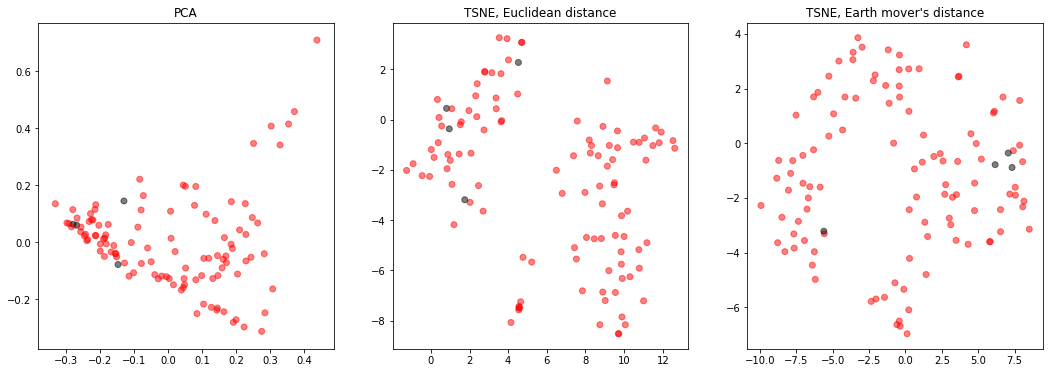

In [9]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Earth mover's distance")
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

KMeans clustering (with Earth mover's distance metric)

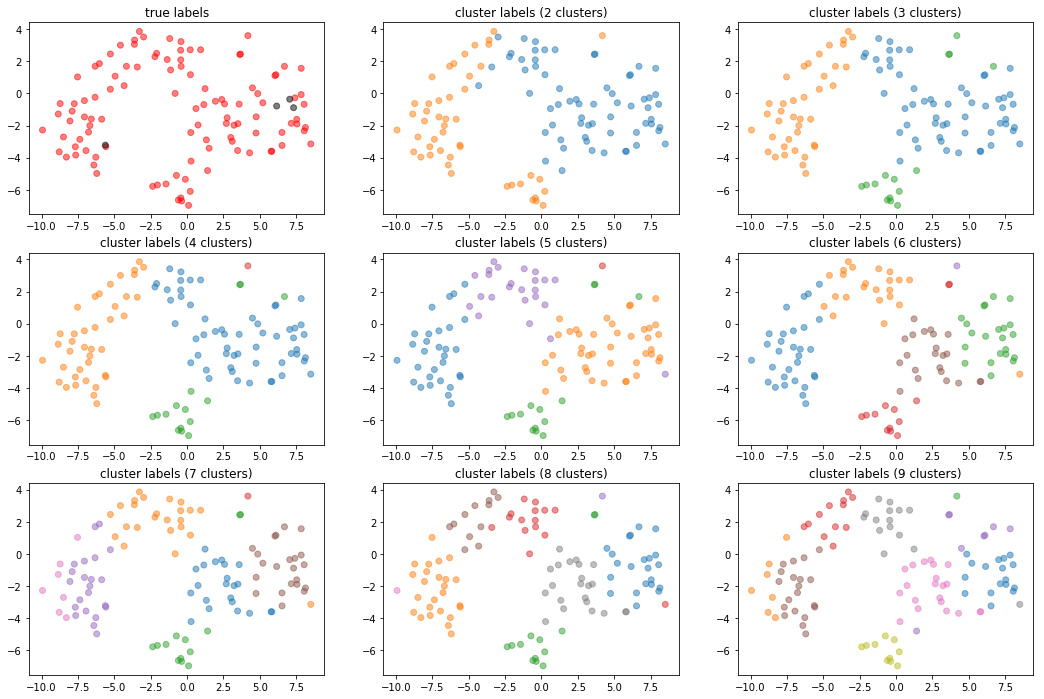

In [11]:
# visualization - tsne with Earth mover's distance
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [12]:
n = 9

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])

0 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',0
26,b' ',b'bll ',b'',b'hbl',0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',0
39,b' ',b'PSR ',b'',b'pwn',0
40,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1
41,b'1FGL J1028.4-5819 ',b'PSR ',b'',b'pwn',0
44,b'1FGL J1119.4-6127c',b'PSR ',b'',b'pwn',0


1 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',0
33,b' ',b'PWN ',b'',b'pwn',0
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',0
72,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',0
74,b'1FGL J1653.9+3945 ',b'BLL ',b'',b'hbl',0
91,b'1FGL J1834.3-0842c',b'snr ',b'',b'unid',0
92,b' ',b'PWN ',b'',b'unid',0


2 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',0


3 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',0
47,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',0
98,b'1FGL J2001.1+4351 ',b'bll ',b'',b'ibl',0
104,b'1FGL J2158.8-3013 ',b'bll ',b'',b'hbl',0


4 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
13,b' ',b'rdg ',b'',b'hbl',0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',0
48,b'1FGL J1221.3+3008 ',b'bll ',b'',b'hbl',0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',0
73,b' ',b'spp ',b'',b'unid',0
83,b' ',b' ',b'',b'unid',0
85,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
86,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0


5 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
5,b' ',b'bll ',b'',b'hbl',0
24,b' ',b'PWN ',b'',b'pwn',0
37,b' ',b'bll ',b'',b'hbl',0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',0
54,b' ',b'PWN ',b'',b'pwn',0
55,b' ',b'bcu ',b'',b'hbl',0
60,b'1FGL J1426.9+2347 ',b'BLL ',b'',b'hbl',0
61,b'1FGL J1428.7+4239 ',b'bll ',b'',b'hbl',0
62,b'1FGL J1442.8+1158 ',b'bll ',b'',b'hbl',0


6 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b' ',b'bll ',b'',b'hbl',0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',0
22,b' ',b'PWN ',b'',b'psr',0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',0
51,b'1FGL J1224.7+2121 ',b'FSRQ ',b'',b'fsrq',0


7 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',0
50,b' ',b'bll ',b'',b'hbl',0
52,b'1FGL J1230.8+1223 ',b'rdg ',b'',b'fri',0
76,b'1FGL J1714.5-3830c',b'snr ',b'',"b'snr,mc'",0
79,b'1FGL J1725.0+1151 ',b'bll ',b'',b'hbl',0


8 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b' ',b'snr ',b'',b'snr',0
10,b' ',b'bll ',b'',b'hbl',0
16,b' ',b'bll ',b'',b'hbl',0
21,b' ',b' ',b'',"b'snr,mc'",0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',0
57,b' ',b'PSR ',b'',b'pwn',0
66,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',0
